<a href="https://colab.research.google.com/github/RodrigoZonzin/complex_networks/blob/main/atv3/trabalho_redes_WS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

In [2]:
redes = []
n = 1000

for p in range(1, 10, 1):
  G = nx.watts_strogatz_graph(n, k = 6, p =p/10, seed = 42)
  redes.append(G)
  print(p/10)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [3]:
def analisar_rede(rede):
  degree = np.array([a[1] for a in nx.degree(rede)])
  degree_avg = degree.mean()
  avg_clustering = nx.average_clustering(rede)
  density = nx.density(rede)
  avg_distance = nx.average_shortest_path_length(rede)

  return {"degree_avg": degree_avg,
          "avg_clustering": avg_clustering,
          "density": density,
          "avg_distance": avg_distance}

In [4]:
metricas = pd.DataFrame()

In [5]:
for i, rede in enumerate(redes):
  metricas[(i+1)/10] = analisar_rede(rede)

In [6]:
metricas = metricas.T

In [14]:
metricas

,Grau Médio,Clustering Medio,Densidade,Distancia Media
0.1,6.0,0.452418,0.006006,6.206645
0.2,6.0,0.322276,0.006006,5.152745
0.3,6.0,0.226358,0.006006,4.678943
0.4,6.0,0.149615,0.006006,4.441758
0.5,6.0,0.079874,0.006006,4.275407
0.6,6.0,0.041991,0.006006,4.185229
0.7,6.0,0.021009,0.006006,4.128180
0.8,6.0,0.009812,0.006006,4.110953
0.9,6.0,0.004396,0.006006,4.099197


In [8]:
metricas.columns = ['Grau Médio', 'Clustering Medio', 'Densidade', 'Distancia Media']

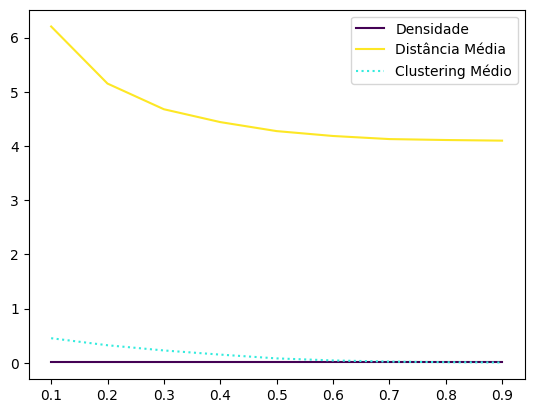

In [30]:
metricas[['Densidade', 'Distancia Media']].plot(cmap='viridis')
plt.plot(metricas['Clustering Medio'], color='#34ebde', linestyle='dotted')
plt.legend(["Densidade", "Distância Média", "Clustering Médio"])
plt.show()

In [15]:
correlacao = metricas.corr()

In [16]:
correlacao

,Grau Médio,Clustering Medio,Densidade,Distancia Media
Grau Médio,NaN,NaN,NaN,NaN
Clustering Medio,NaN,1.000000,NaN,0.966982
Densidade,NaN,NaN,NaN,NaN
Distancia Media,NaN,0.966982,NaN,1.000000


In [11]:
import seaborn as sn

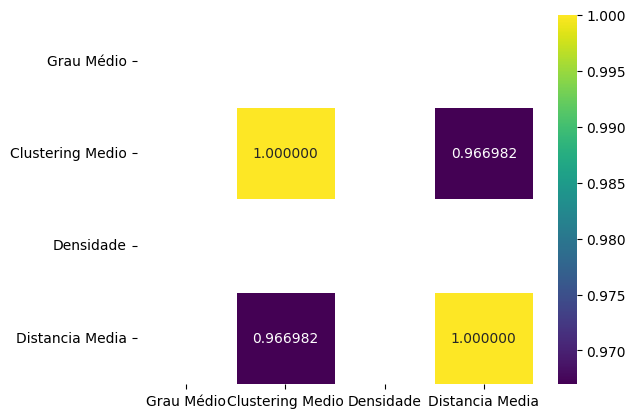

In [12]:
plot = sn.heatmap(correlacao, annot = True, fmt=".6f", linewidths=.5, cmap = 'viridis')

In [23]:
pos = nx.circular_layout(redes[0], scale=1, center=None, dim=2)

In [25]:
centralidade = []
for rede in redes:
  centralidade.append(nx.degree_centrality(rede))

In [26]:
centralidade_redes = pd.DataFrame(data=centralidade)
centralidade_redes = centralidade_redes.T

In [27]:
def draw_net(ax, G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, ax=ax, cmap='viridis',
                                   node_color=list(measures),
                                   edgecolors='black',
                                   nodelist=measures.keys(),
                                   node_size=list(measures))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    edges = nx.draw_networkx_edges(G, pos, ax=ax)

    ax.set_title(measure_name)
    plt.colorbar(nodes, ax=ax, location='bottom', fraction=0.03, pad=0.03)
    ax.axis('off')

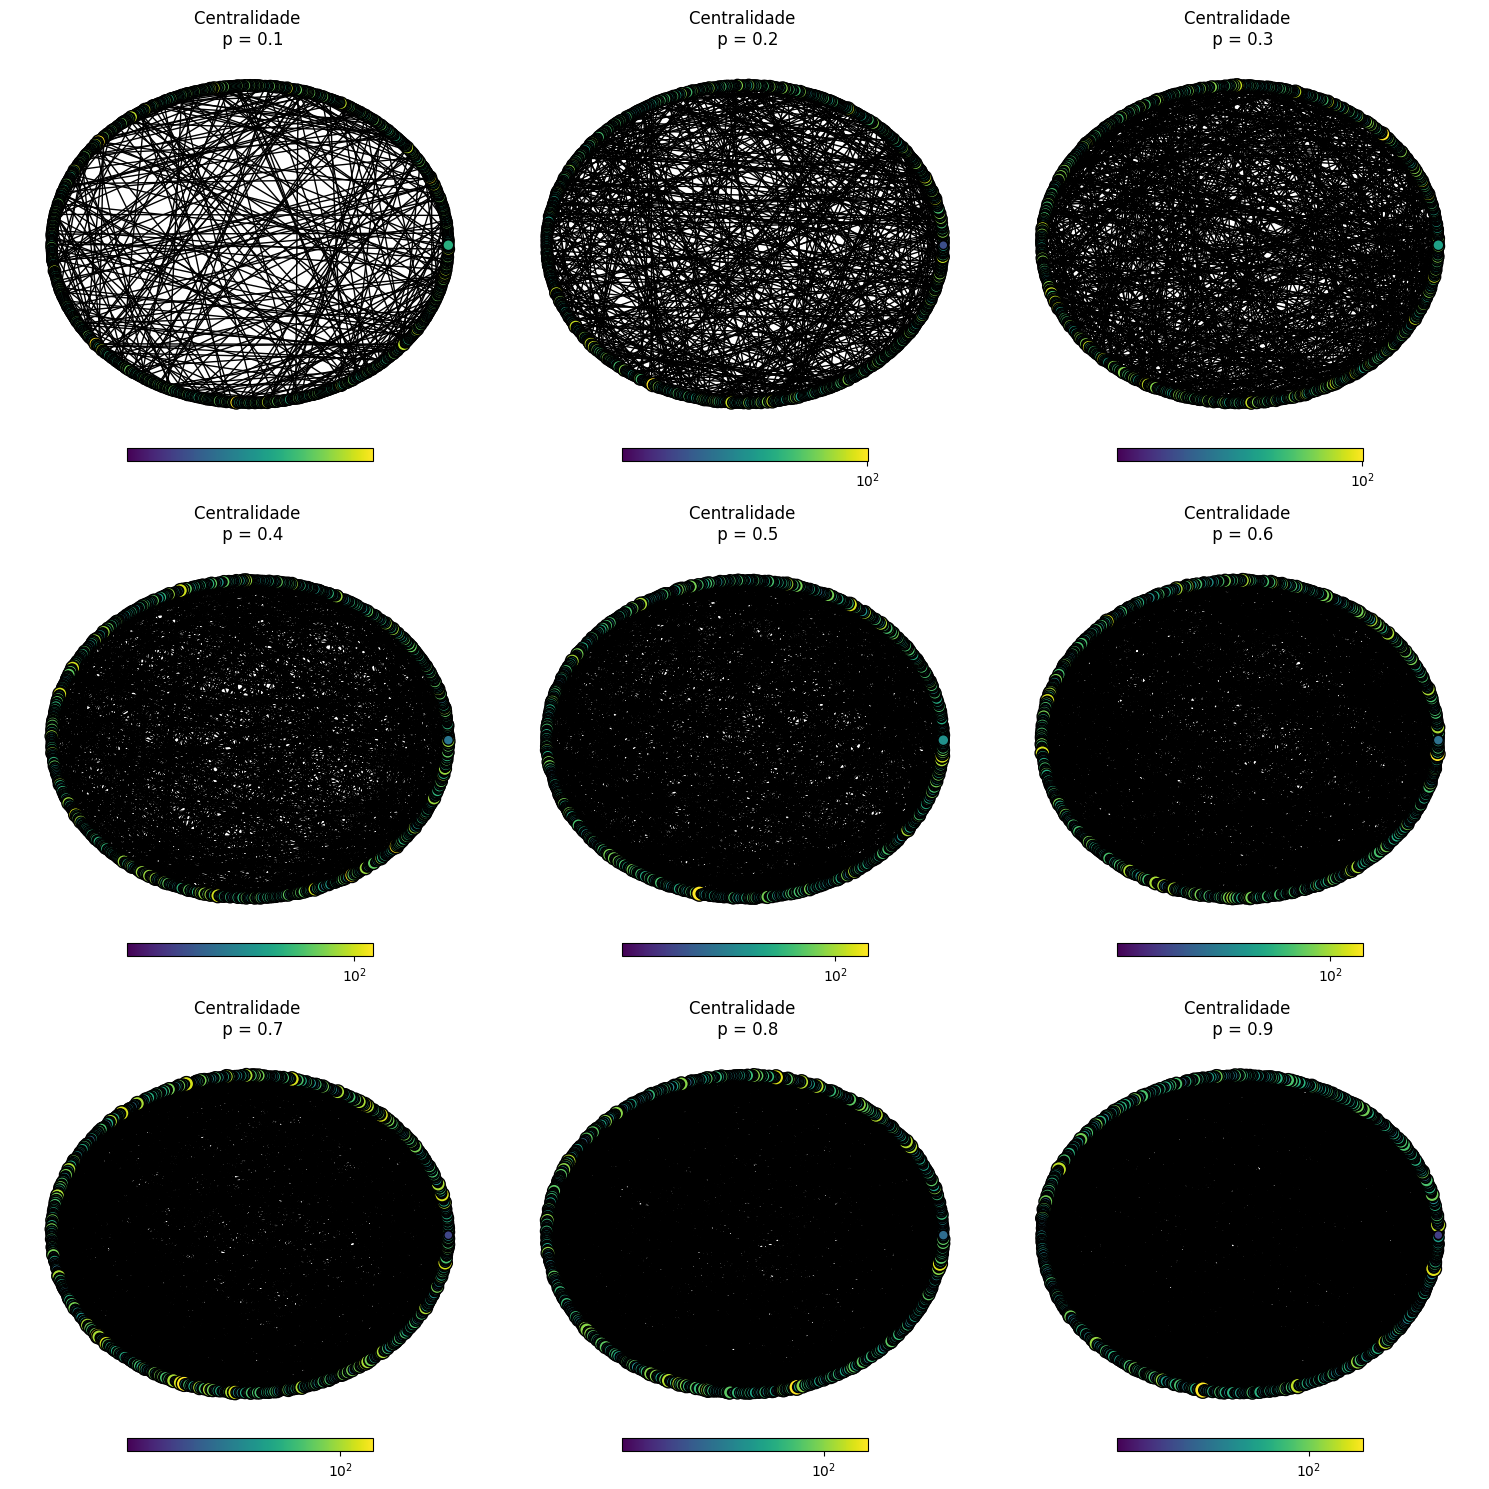

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
axs = ax.flatten()

for i, rede in enumerate(redes):
    draw_net(axs[i], rede, pos, centralidade_redes[i]*10000, f"Centralidade \n p = {(i+1)/10}")

plt.tight_layout()
plt.show()

In [38]:
def print_logLog(axi, rede, i):
  if i == 0:
    ii = 1
  else:
    ii = i
  # Calculate the frequency counts
  degree_counts = nx.degree_histogram(rede)

  # Normalize the frequency counts to get probabilities
  total_nodes = rede.order()
  degree_probs = [count / total_nodes for count in degree_counts]

  # Plot the degree distribution on a log-log scale
  axi.plot(range(len(degree_probs)), degree_probs, '-', color='#4e8a74')
  #axi.set_xlim(80*ii, 9.5*10**2)
  axi.set_title(f"p = {(i+1)/10}")
  #axi.set_xlabel('Degree (log)')
  #axi.set_ylabel('Probability (log)')

In [32]:
#plot the histogram
def printHistogram(axi, dados):
  axi.hist(dados, bins=6, color='#a65c2b', edgecolor='#a65c2b')
  axi.set_title( f"p = {(i)/10}" )
  axi.set_xlabel('Degree')
  axi.set_ylabel('Frequencia')
  #plt.show()

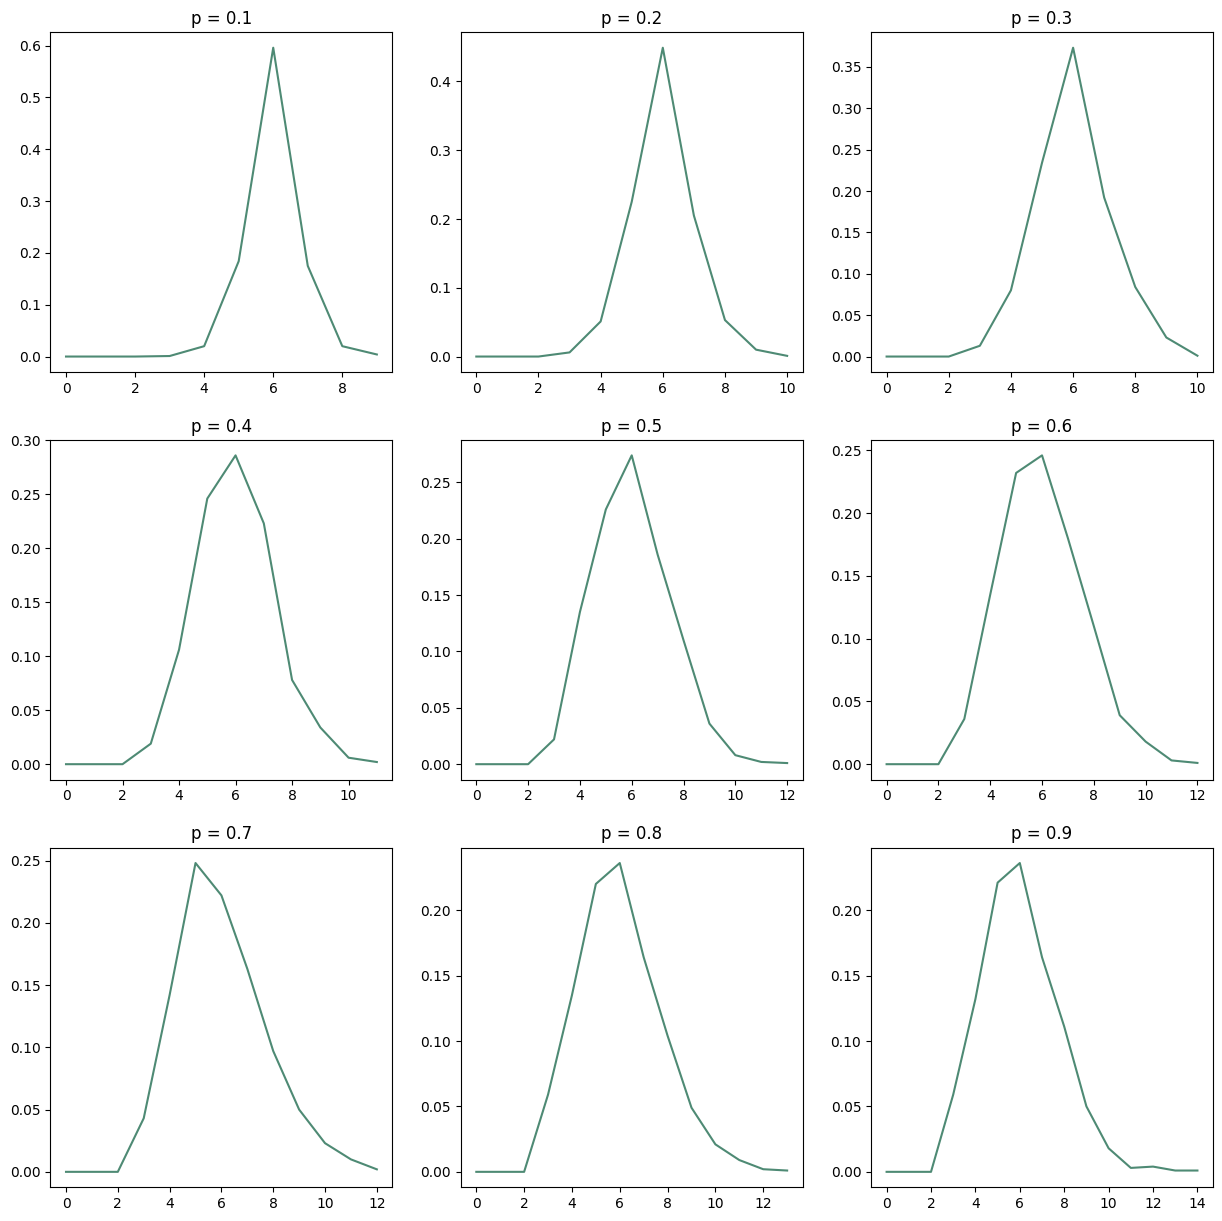

In [39]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
axs = ax.flatten()

for i, rede in enumerate(redes):
  print_logLog(axs[i], rede, i)
  #printHistogram(axs[i], nx.degree_histogram(rede))

plt.show()